# ML - Aprendizaje No Supervisado

Si bien todos los ejemplos de *Machine Learning* que hemos visto hasta ahora en esta serie se han basado en aprendizaje supervisado (nuestros datos van acompañados de las etiquetas correspondientes, ejemplos de la tarea que queremos llevar a cabo) la mayoría de los datos no están etiquetados. Antes esta problemática tenemos dos alternativas: etiquetar datos manualmente (lo cual require de tiempo, esfuerzo y dinero en el caso de querer desarrollar sistemas reales) o bien usar técnicas de aprendizaje no supervisado, o *Unsupervised Learning* en inglés.

## Clustering

De entre las diferentes técnicas de aprendizaje no supervisado, el *Clustering* es una de las más usadas. Este técnica consiste en identificar aquellas muestras similares del conjunto de datos y asignarlas a un *cluster*, o grupo. Esto permite aplicaciones tales como: segmentación de clientes, análisis de datos, reducción de la dimensionalidad, detección de anomalías, aprendizaje semi-supervisado, motores de búsqueda e incluso la semgentación de imágenes.

### K-Means

El algoritmo de *K-Means* es uno de los más usados a la hora de aplicar *Clustering*, ya que es un método rápido y eficiente. Vamos a generar un conjunto de datos sintético para aprender a usar esta técnica.

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np

# Generar entre 1 y 10 centroides aleatorios
num_clusters = np.random.randint(1, 11)

# Asegurar una distancia considerable entre los centros (entre -20 y 20)
blob_centers = np.random.uniform(low=-10, high=10, size=(num_clusters, 2))

# Generar una desviación estándar pequeña para cada cluster
blob_std = np.random.uniform(low=1.0, high=1.5, size=num_clusters)

# Crear el dataset usando make_blobs con los centros y las desviaciones estándar generadas
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

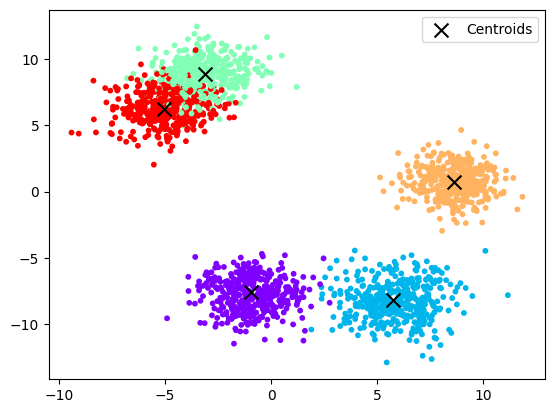

In [ ]:
# Para ver cómo se distribuyen los puntos y los centroides generados
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap="rainbow")
plt.scatter(blob_centers[:, 0], blob_centers[:, 1], c='black', marker='x', s=100, label='Centroids')
plt.legend()
plt.show()


En *Scikit-Learn* puedes usar el objeto [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), indicando el número de clusters deseado.  

In [ ]:
from sklearn.cluster import KMeans
#Definimos el numero de clusters
k = 9
#Inicialización del modelo KMeans
kmeans = KMeans(n_clusters=k, random_state=42)
#Ajustamos el modelo y predecimos etiquetas
y_pred = kmeans.fit_predict(X)
y_pred

array([7, 1, 0, ..., 2, 5, 1], dtype=int32)

In [ ]:
#Coordenadas de los centroides
kmeans.cluster_centers_

array([[-1.38877179, -8.73912534],
       [-2.94910009,  9.7297084 ],
       [ 8.95588831, -0.19054977],
       [ 5.88824795, -8.25044977],
       [-5.05169957,  7.8067158 ],
       [-0.44974039, -6.86577251],
       [ 8.30259247,  1.54825475],
       [-2.51729247,  7.520848  ],
       [-5.26708798,  5.48401429]])

In [ ]:
X_new = np.array([[6, -8], [3, 2],[3, 8],[2, 2],[3, 2],[1, 3],[-5, 2],[-3, -5],[-3-5, 2]])
kmeans.predict(X_new)

array([3, 6, 7, 6, 6, 7, 8, 5, 8], dtype=int32)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#Grafica los datos de X
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

#Dibuja los centroides
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

#Dibuja las fronteras de desicion
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

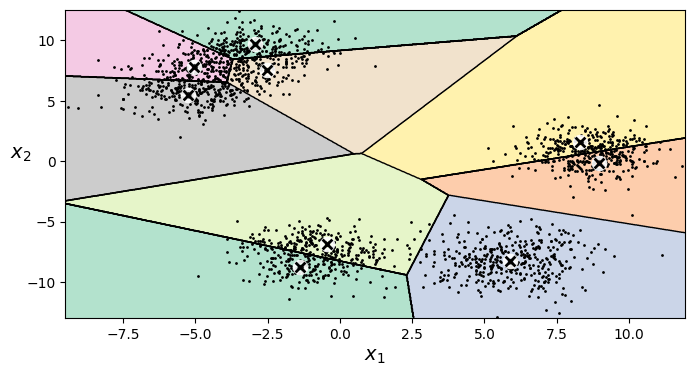

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [ ]:
#El método kmeans.transform(X_new)
#devuelve la distancia de cada punto en X_new a cada uno de los centroides del modelo KMeans
kmeans.transform(X_new)

array([[ 7.42564845, 19.86023546,  8.35013704,  0.274251  , 19.28710263,
         6.54871156,  9.82197031, 17.70426484, 17.5717362 ],
       [11.60129868,  9.75398297,  6.34595255, 10.64958669,  9.92712518,
         9.51328708,  5.32180051,  7.80514438,  8.97123734],
       [17.30490205,  6.19545665, 10.12707811, 16.50512327,  8.05401917,
        15.26079622,  8.35119774,  5.53805948,  8.64146561],
       [11.26110951,  9.17834319,  7.29266004, 10.96312878,  9.13479147,
         9.19799708,  6.3187614 ,  7.13342091,  8.05908949],
       [11.60129868,  9.75398297,  6.34595255, 10.64958669,  9.92712518,
         9.51328708,  5.32180051,  7.80514438,  8.97123734],
       [11.97970344,  7.8028435 ,  8.57180066, 12.26652306,  7.72836234,
         9.97172074,  7.4454967 ,  5.72795015,  6.74141816],
       [11.33003894,  7.9971609 , 14.12675924, 14.95411863,  5.80694594,
         9.96527896, 13.31026071,  6.05339569,  3.49423691],
       [ 4.0715003 , 14.72979634, 12.88697314,  9.46395136, 12

In [ ]:
# init="random": Los centroides iniciales se seleccionan de forma aleatoria.
# n_init=1: Solo se inicializa el algoritmo una vez (en lugar de probar múltiples inicializaciones y seleccionar la mejor).
# algorithm="full": Utiliza la implementación estándar del algoritmo K-Means.
kmeans_iter1 = KMeans(n_clusters=9, init="random", n_init=1,
                      algorithm="lloyd", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=9, init="random", n_init=1,
                      algorithm="lloyd", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=9, init="random", n_init=1,
                      algorithm="lloyd", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(init='random', max_iter=3, n_clusters=9, n_init=1, random_state=1)

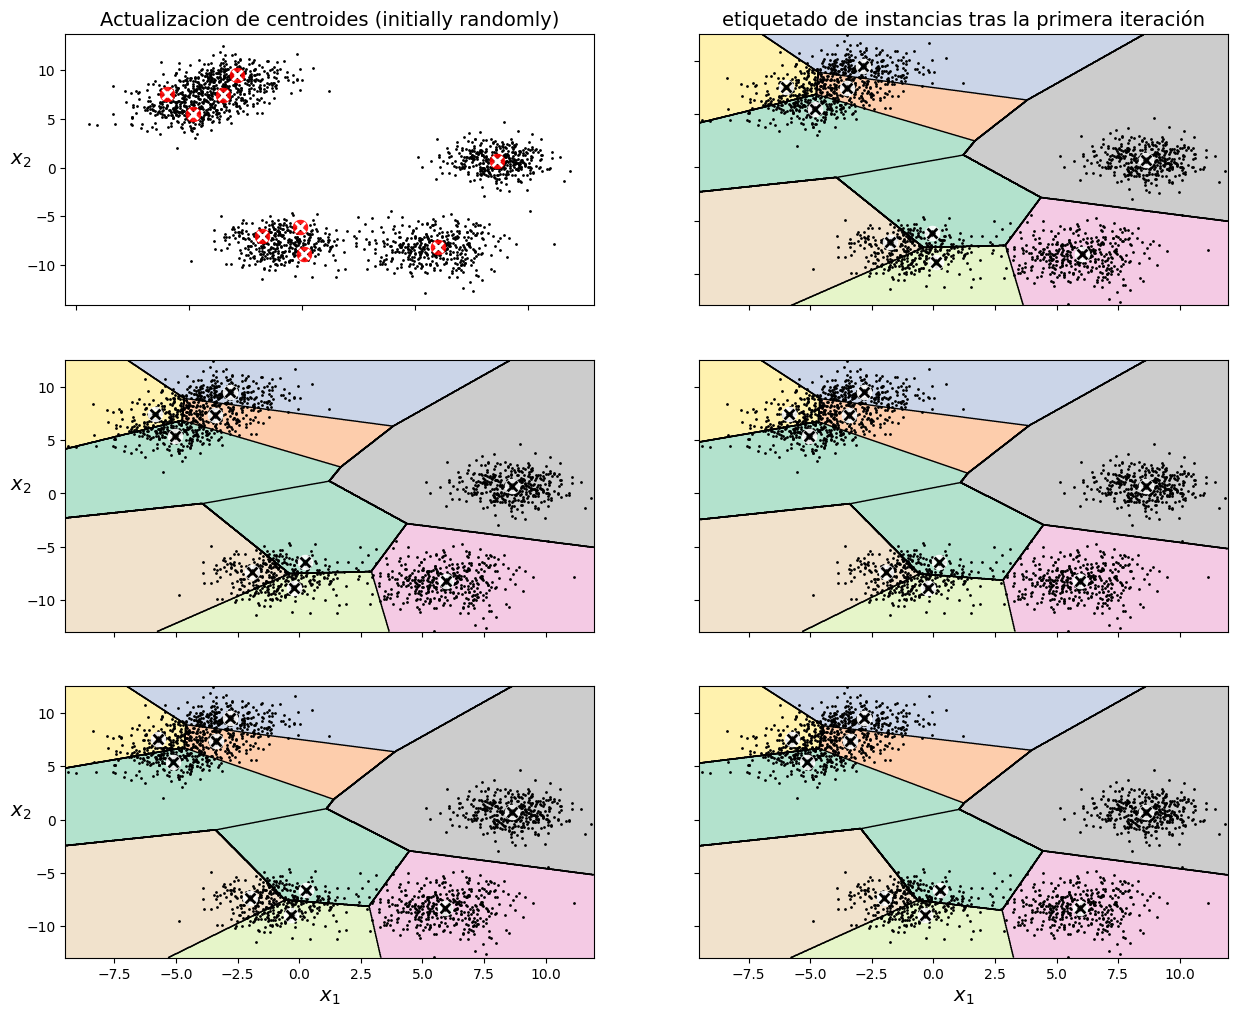

In [ ]:
plt.figure(figsize=(15, 12))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Actualizacion de centroides (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("etiquetado de instancias tras la primera iteración", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

In [ ]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

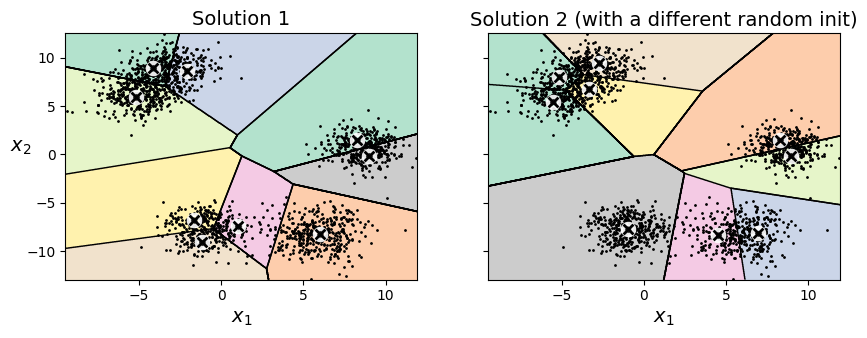

In [ ]:
# Dos modelos KMeans pero con diferentes semillas aleatorias para la inicialización de los centroides.
kmeans_rnd_init1 = KMeans(n_clusters=9, init="random", n_init=1,
                         algorithm="lloyd", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=9, init="random", n_init=1,
                         algorithm="lloyd", random_state=19)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show()

In [ ]:
# n_init=10: Este parámetro indica que el algoritmo se ejecutará 20 veces con diferentes inicializaciones aleatorias.
# Al final, se seleccionará la mejor solución (es decir, la que tenga el menor error cuadrático medio).
kmeans_rnd_10_inits = KMeans(n_clusters=9, init="random", n_init=10,
                              algorithm="lloyd", random_state=14)
kmeans_rnd_10_inits.fit(X)

KMeans(init='random', n_clusters=9, n_init=10, random_state=14)

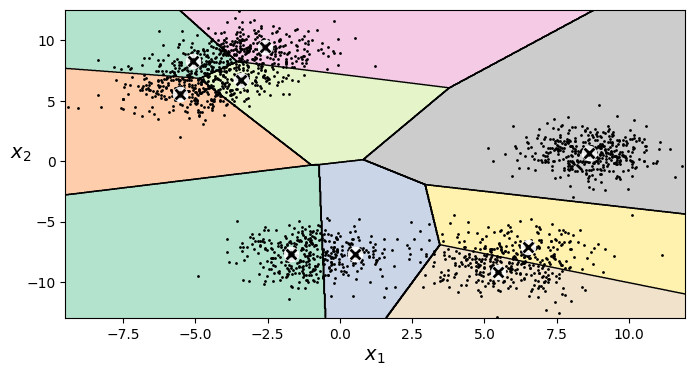

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()


El algoritmo de mini-batch K-Means es más rápido que K-Means normal, pero su precisión suele ser peor.


> Encontrando el número óptimo de grupos


Como hemos visto anteriormente, el número de grupos o clusters es un hyperparámetro del modelo que debemos definir, y como podrás imaginar si nuestros datos no están etiquetados no será imposible saber qué valor usar. Para ello la solución se basa en usar diferentes valores y utilizar alguna métrica significativa. Una de estas métricas se conoce como el silhouette score, que se basa en calcular el coeficiente de silueta (silhouette coefficient) de todas las muestras del dataset como  (b−a)/max(a,b)  donde  a  es la distancia mínima al resto de muestras del mismo grupo y  b  es la distancia media de los grupos más cercanos. Su valor se encuentra entre  1  y  −1 . Un valor cercano a  1  indica que la muestra está bien metida en su grupo y lejos de los demás mientras que un valor cercano a  0  indica que la muestra se encuentra cerca de una frontera de decisión y un valor cercano a  −1  indica que la muestra está en el grupo incorrecto.

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.38356725548626897

Calculando la métrica para diferentes números de clusters podemos encontrar el valor óptimo.

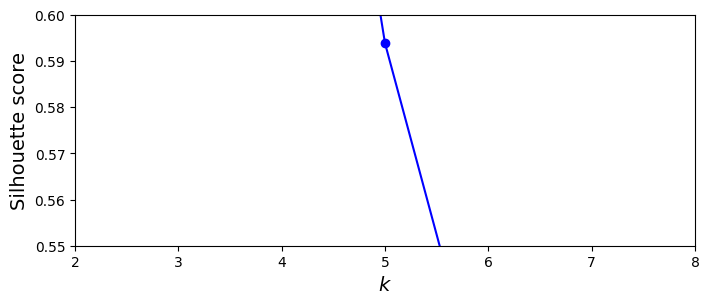

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([2, 8, 0.55, 0.6])
plt.show()

También es muy útil visualizar los diagramas de silueta, en el que visualizaremos todos los coeficientes de silueta ordenados por grupos y su valor.


Mod

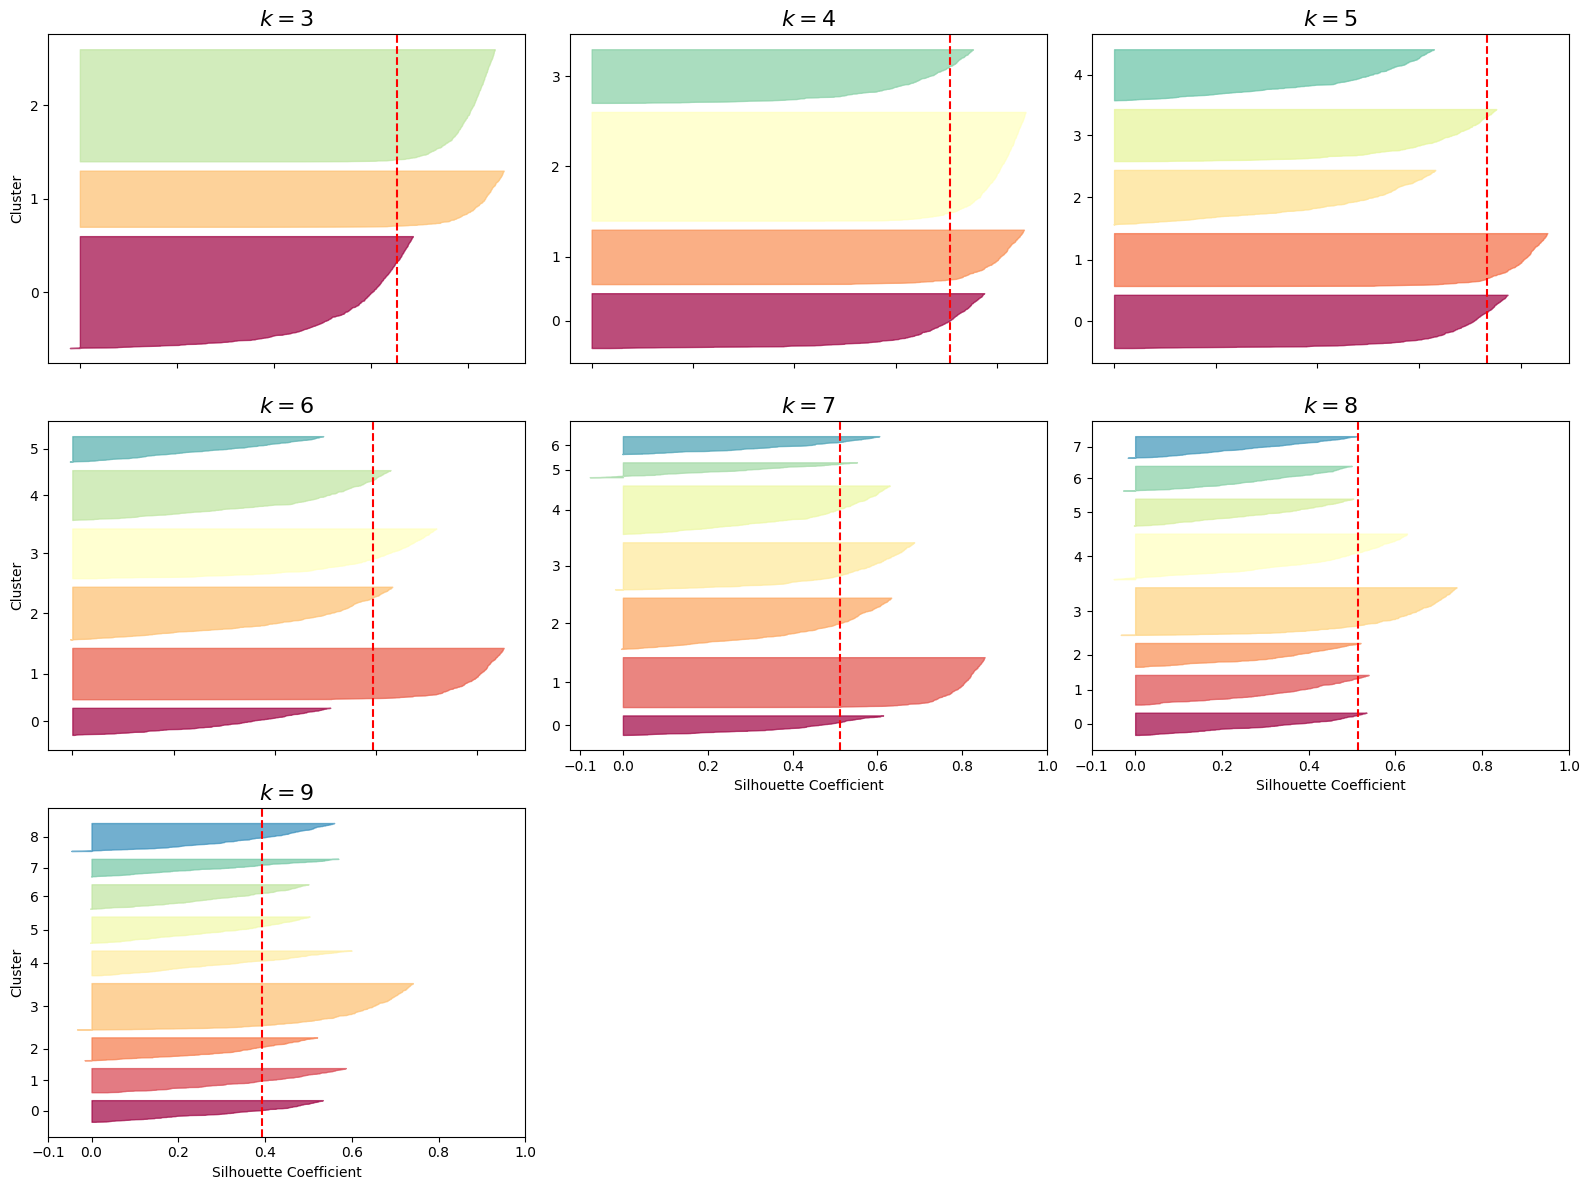

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Supongo que ya tienes definidos kmeans_per_k y X, además de silhouette_scores

plt.figure(figsize=(16, 12))  # Ajuste del tamaño de la figura

# Bucle que itera sobre los valores de k desde 3 hasta 9
for k in range(3, 10):
    plt.subplot(3, 3, k - 2)  # Ahora hay un grid de 3x3 para acomodar 9 gráficos

    # Asignación de etiquetas a cada punto en el dataset para k clusters
    y_pred = kmeans_per_k[k - 1].labels_

    # Cálculo de los coeficientes silhouette
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []

    # Para cada cluster, dibuja los coeficientes silhouette
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)  # Colores diferenciados para cada cluster
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    # Personalización de los ejes y etiquetas
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 6, 9):
        plt.ylabel("Cluster")

    if k in (7, 8, 9):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    # Línea vertical que indica la puntuación promedio del coeficiente silhouette
    plt.axvline(x=silhouette_scores[k - 3], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.tight_layout()  # Ajusta el layout para evitar solapamientos
plt.show()

##APRENDIZAJE SEMISUPERVISADO

In [7]:
#Librerias
#Libreria para leer y escribir datos en varios formatos
import scipy.io
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
# Manipulación y análisis de datos
import pandas as pd

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Obtenemos los datos
df = pd.read_csv('/content/drive/MyDrive/IA/datasets/train.csv', delimiter=',')
df

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,59,43,50,68,98,119,139,145,149,149,...,58,65,59,46,57,104,140,84,72,6
1,154,126,105,102,125,155,172,180,142,111,...,42,67,101,122,133,136,139,142,144,9
2,255,253,253,253,253,253,253,253,253,253,...,83,80,69,66,72,79,83,83,84,9
3,28,37,38,42,44,40,40,24,32,43,...,39,59,42,44,48,38,28,37,46,4
4,170,168,177,183,181,177,181,184,189,189,...,88,85,82,83,79,78,82,78,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,145,151,156,155,153,153,157,161,161,161,...,68,64,61,63,59,57,56,53,54,2
49996,255,254,255,254,254,254,254,253,254,254,...,61,64,68,64,76,82,79,81,76,6
49997,35,40,42,39,43,45,48,51,53,56,...,94,104,103,96,93,87,77,66,50,9
49998,189,186,185,184,182,181,180,180,181,180,...,166,171,171,172,169,165,169,171,171,1


In [10]:
from sklearn.utils import shuffle
# Mezclar el conjunto de datos
data = shuffle(df, random_state=42)

In [11]:
# Aplicando la libreria, separamos los datos del 80% y 20% del Dataset
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Dividimos los datos para X_test y y_test donde seran los datos para el prueba
X_test = test_data.drop(['label'], axis=1)
y_test = test_data['label']

# Dividimos los datos para X_train y y_train donde seran los datos para el entrenamiento
X_train = train_data.drop(['label'], axis=1)
y_train = train_data['label']
m_train = len(y_train)

# Mostramos la cantidad de ejemplos que tienen X_train y y_train
print('-' * 80)
print("El 80% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(train_data)))
print("El 20% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(test_data)))

--------------------------------------------------------------------------------
El 80% de ejemplos que seran para el entrenamiento son: 40000
El 20% de ejemplos que seran para el entrenamiento son: 10000


In [12]:
import numpy as np

# Normalizar las imágenes de entrenamiento y prueba
X_train_ = X_train / 255.0
X_test_ = X_test / 255.0

In [15]:
from sklearn.cluster import MiniBatchKMeans

k = 100
batch_size = 7199 # Puedes ajustar el tamaño del lote según la memoria disponible
minibatch_kmeans = MiniBatchKMeans(n_clusters=k, batch_size=batch_size, random_state=42)

# Aplica MiniBatchKMeans
X_imagenes_dist = minibatch_kmeans.fit_transform(X_train)
X_imagenes_dist

array([[7093.51781321, 5512.85244312, 2989.27101951, ..., 4044.8079087 ,
        5124.85890644, 4725.01310366],
       [5839.47831485, 3829.50321062, 3234.31995521, ..., 2654.29190085,
        3821.2290673 , 2740.21353097],
       [3375.04472116, 3154.34203674, 5330.60029525, ..., 4854.31432342,
        3568.36535702, 4360.60058016],
       ...,
       [2514.45820279, 2559.76115275, 5047.03693686, ..., 4175.34955186,
        3003.99417323, 4297.42306   ],
       [3883.30764305, 3237.45326235, 5322.02668747, ..., 3932.0911027 ,
        4146.44988925, 4142.84184144],
       [4677.05108325, 4393.51475573, 6652.55272727, ..., 6401.96170564,
        4647.16098955, 4964.46763392]])

In [16]:
idxs = np.argmin(X_imagenes_dist, axis=0)
X_representative_images = X_train.values[idxs]

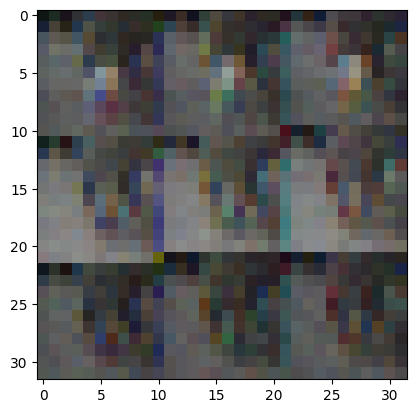

In [18]:
plt.imshow(X_representative_image.reshape(32, 32, 3))  # Reajustar las imágenes a su forma original


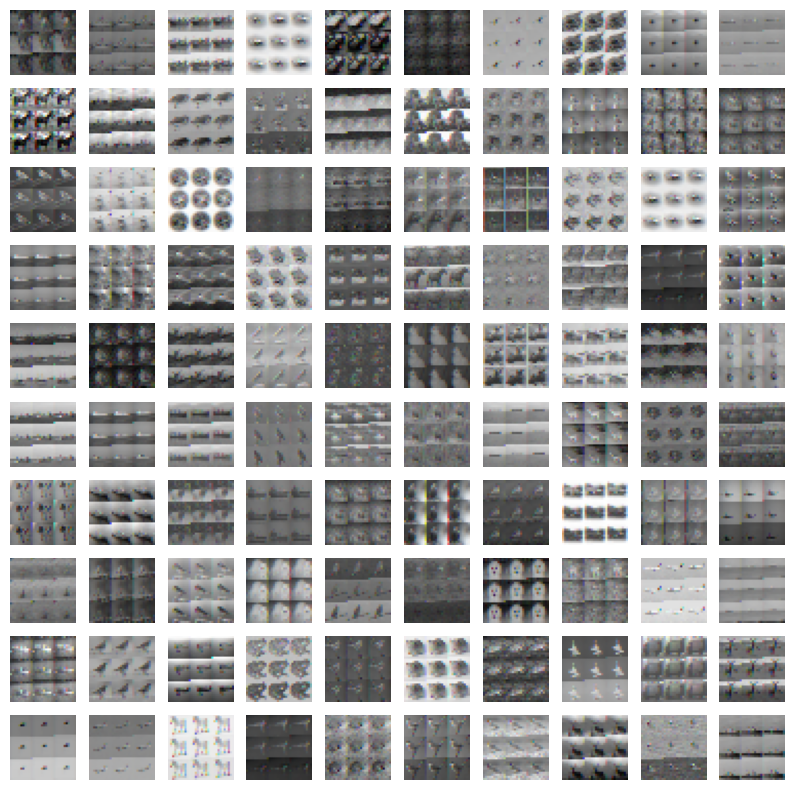

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))  # Ajustamos el tamaño de la figura para que se vean mejor las imágenes
for index, X_representative_image in enumerate(X_representative_images):
    plt.subplot(10, 10, index + 1)  # Crear una cuadrícula de 10x10 (ajusta según el número de imágenes)
    plt.imshow(X_representative_image.reshape(32, 32, 3))  # Redimensionar correctamente a 32x32x3 (RGB)
    plt.axis('off')  # Ocultar los ejes
plt.show()
